In [1]:
import numpy as np
data = np.genfromtxt('PCB.dt', delimiter='\t')
print(data)

[[ 1.   0.6]
 [ 6.   3.4]
 [ 1.   1.6]
 [ 6.   9.7]
 [ 1.   0.5]
 [ 6.   8.6]
 [ 1.   1.2]
 [ 7.   4. ]
 [ 2.   2. ]
 [ 7.   5.5]
 [ 2.   1.3]
 [ 7.  10.5]
 [ 2.   2.5]
 [ 8.  17.5]
 [ 3.   2.2]
 [ 8.  13.4]
 [ 3.   2.4]
 [ 8.   4.5]
 [ 3.   1.2]
 [ 9.  30.4]
 [ 4.   3.5]
 [11.  12.4]
 [ 4.   4.1]
 [12.  13.4]
 [ 4.   5.1]
 [12.  26.2]
 [ 5.   5.7]
 [12.   7.4]]


In [2]:
x = data[...,0].reshape(-1, 1)  # Take first column, and reshape it to 2D vector
y = data[...,1]  # Take second column
print("x:\n", x)
print("y:\n", y)

x:
 [[ 1.]
 [ 6.]
 [ 1.]
 [ 6.]
 [ 1.]
 [ 6.]
 [ 1.]
 [ 7.]
 [ 2.]
 [ 7.]
 [ 2.]
 [ 7.]
 [ 2.]
 [ 8.]
 [ 3.]
 [ 8.]
 [ 3.]
 [ 8.]
 [ 3.]
 [ 9.]
 [ 4.]
 [11.]
 [ 4.]
 [12.]
 [ 4.]
 [12.]
 [ 5.]
 [12.]]
y:
 [ 0.6  3.4  1.6  9.7  0.5  8.6  1.2  4.   2.   5.5  1.3 10.5  2.5 17.5
  2.2 13.4  2.4  4.5  1.2 30.4  3.5 12.4  4.1 13.4  5.1 26.2  5.7  7.4]


In [3]:
c=np.array(np.arange(x.shape[0]))
for i in range(x.shape[0]):c[i]=1
x1 = np.c_[x,c] #add a column of 1 in matrix x after its last column
def reg_func(x,y):
    w=np.dot(np.dot(np.linalg.pinv(np.dot(x.T,x)),x.T),y) #this is the formula: w=(x^T·x)^(-1)·x^T·y
    return w

w2:
 [ 1.55777052 -1.45194395]


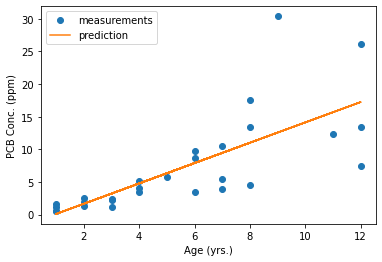

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
w=reg_func(x1,y)
print("w2:\n",w)
predict=np.dot(x1,w.T) #this is the regression prediction result of y
ax.plot(x, y, 'o', label='measurements')
ax.plot(x, predict, '-', label='prediction')
ax.set_xlabel('Age (yrs.)')
ax.set_ylabel('PCB Conc. (ppm)')
ax.legend();

In [5]:
#fig.savefig('Assignment1Question6Plot1.pdf')

w2:
 [0.25912824 0.03147247]


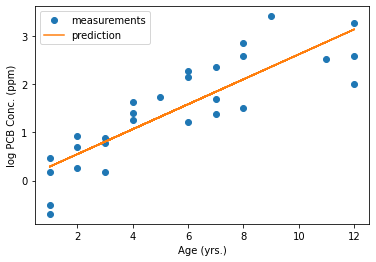

In [6]:
fig2, a2x = plt.subplots()
y2=np.log(y)
w2=reg_func(x1,y2)
predict2=np.dot(x1,w2.T)
print("w2:\n",w2)
a2x.plot(x, y2, 'o', label='measurements')
a2x.plot(x, predict2, '-', label='prediction')
a2x.set_xlabel('Age (yrs.)')
a2x.set_ylabel('log PCB Conc. (ppm)')
a2x.legend();

In [7]:
#fig2.savefig('Assignment1Question6Plot2.pdf')

In [8]:
def mean_error(a,predict_a):
    err = (np.square(a - predict_a)).mean(axis=0)
    return err
err=mean_error(y,predict)
err2=mean_error(y2,predict2)
print(err2)

0.29853492489386174


In [9]:
def R_func(a,predict_a):
    R=1-((np.square(a - predict_a)).sum(axis=0)/(np.square(a - np.mean(a))).sum(axis=0))
    return R
R=R_func(y,predict)
R2=R_func(y2,predict2)
print(R2)

0.7313915439623446


w3:
 [ 1.1986063  -1.19475082]


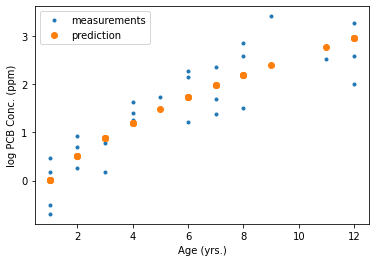

In [10]:
fig3, a3x = plt.subplots()
x3=np.sqrt(x1)
y3=np.log(y)
w3=reg_func(x3,y3)
predict3=np.dot(x3,w3.T)
print("w3:\n",w3)
a3x.plot(x, y3, '.', label='measurements')
a3x.plot(x, predict3, 'o', label='prediction')
a3x.set_xlabel('Age (yrs.)')
a3x.set_ylabel('log PCB Conc. (ppm)')
a3x.legend();

In [11]:
#fig3.savefig('Assignment1Question6Plot3.pdf')

In [12]:
err3=mean_error(y3,predict3)
print(err3)
R3=R_func(y3,predict3)
print(R3)

0.2377249626004808
0.7861056451320498
